# Pull Gross and Net load shapes from DR Path database and write out for further analysis

In [ ]:
import os,sys
import pandas as pd
from dr_path.db import io, models
from dr_path import settings

In [9]:
#Set output directory
outdir = '/mnt/g/Shared drives\BTO Topic 2  Integrating EE & DR\Task 2\Load_Shape_Data\ACEEE load\Gross and Net Load Shapes'.replace('\\','/')


In [10]:
#Close the DB if it's open
try:
    models.database.close()
except:
    pass

db_file = settings.DB_NAME
models.database.init(db_file)

models.database.connect()

True

In [11]:
#Get the gross and net load shapes for each EE demand scenario and write them out
for ds in models.DemandScenario.select():
    print(ds.name)
    gls = models.GrossLoadShape.get(demand_scenario=ds)
    nls = models.NetLoadShape.get(demand_scenario=ds)
    outdf = pd.DataFrame([list(range(1,len(gls.hourly_kwh)+1)), gls.hourly_kwh, nls.hourly_kwh], 
                               index=['hour_ending','gross load','net_load']).T
    
    outdf.to_csv(os.path.join(outdir,settings.REGION,ds.name+'.csv'), index=False)
    
    

BaseDemand_upgrade0_2016AMY
BaseDemand_upgrade1_2016AMY
BaseDemand_upgrade4_2016AMY
BaseDemand_upgrade5_2016AMY
BaseDemand_upgrade2_2016AMY
BaseDemand_upgrade3_2016AMY


In [12]:
#Examine the output
outdf

hour_ending    gross load      net_load
0             1.0  2.749848e+07  2.630826e+07
1             2.0  2.627721e+07  2.514823e+07
2             3.0  2.505880e+07  2.389758e+07
3             4.0  2.404298e+07  2.280764e+07
4             5.0  2.351360e+07  2.235991e+07
...           ...           ...           ...
8779       8780.0  3.193829e+07  2.955601e+07
8780       8781.0  3.064111e+07  2.750957e+07
8781       8782.0  2.915349e+07  2.636321e+07
8782       8783.0  2.851440e+07  2.630383e+07
8783       8784.0  2.724602e+07  2.551454e+07

[8784 rows x 3 columns]

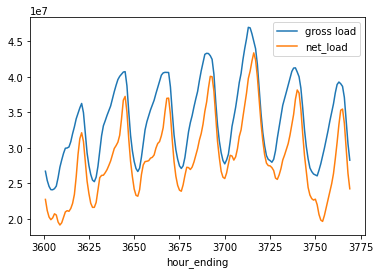

In [13]:
#Make some plots to make sure things look reasonable
outdf.loc[150*24:157*24].plot(x='hour_ending')

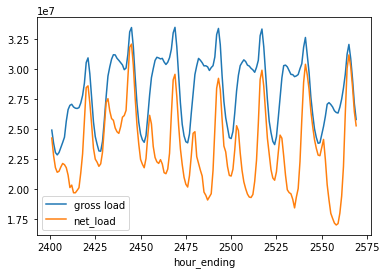

In [14]:
upg='0'
pd.read_csv(os.path.join(outdir,settings.REGION,ds.name.replace('5',upg)+'.csv')).loc[100*24:107*24].plot(x='hour_ending')

In [8]:
models.database.close()

True

In [21]:
max([1,2,3])

3